# **Exploratory Data Analysis**

**Course:** Master in Big Data, Data Science & AI — Master Thesis  
**Author:** Carlota Trigo La Blanca  

*This notebook will be used to do the exploratory data analysis of the metadata extracted from the database developed for my Master Thesis.*


## **Initialization**

In [2]:
# 1) Install GCS connector
!pip install -q gcsfs

# 2) Auth to your Google account
from google.colab import auth
auth.authenticate_user()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Theme & style
sns.set_theme(style="whitegrid")          # optional, pick your style

# Colors: use Viridis everywhere
sns.set_palette("viridis")                # discrete color cycle for lines/bars
plt.rcParams["image.cmap"] = "viridis"    # default colormap for imshow/matshow

# Font sizes (global)
plt.rcParams.update({
    "axes.titlesize": 10,       # axes titles (ax.set_title)
    "figure.titlesize": 10,     # figure titles (plt.suptitle)
    "axes.labelsize": 9,        # x/y axis labels
    "xtick.labelsize": 8,       # tick labels
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "legend.title_fontsize": 9,
})

## **Load Dataset**

Only run this cells if it is the first time you run this notebook.

In [5]:
# df1 = pd.read_csv('gs://ucm_tfm_datos_carlotatrigo/metadata.csv')
# df1.head()

In [6]:
# df2 = pd.read_csv('gs://ucm_tfm_datos_carlotatrigo/metadata_images.csv').drop(columns = ['r_std', 'b_std', 'g_std'])
# df2.head()

In [7]:
# df = pd.merge(df1, df2, on='image_id')
# df.to_csv('gs://ucm_tfm_datos_carlotatrigo/metadata_merged.csv')
# df.head()

This loads the full metadata dataset

In [8]:
df = pd.read_csv('gs://ucm_tfm_datos_carlotatrigo/metadata_merged.csv').drop(columns = 'Unnamed: 0')
df.head()

,image_id,origin_dataset,lesion_type,diagnosis,body_region,age,gender,width,height,brightness,blur_var,hue_entropy,hair_ratio,r_mean,g_mean,b_mean,image_path,image_relpath
0,ISIC_0000000.jpg,ISIC2019,benign,NV,anterior torso,55,female,1022,767,146.011057,58.207238,4.944169,0.033000,131.888702,148.384262,170.699432,E:\TFM\data_clean\images\ISIC_0000000.jpg,ISIC_0000000.jpg
1,ISIC_0000001.jpg,ISIC2019,benign,NV,anterior torso,30,female,1022,767,163.783566,165.577662,3.955812,0.008165,166.312958,162.109421,165.668823,E:\TFM\data_clean\images\ISIC_0000001.jpg,ISIC_0000001.jpg
2,ISIC_0000002.jpg,ISIC2019,malignant,MEL,upper extremity,60,female,1022,767,150.604949,484.859794,4.656093,0.017591,136.081207,150.808182,187.607910,E:\TFM\data_clean\images\ISIC_0000002.jpg,ISIC_0000002.jpg
3,ISIC_0000003.jpg,ISIC2019,benign,NV,upper extremity,30,male,1022,767,179.790553,41.898723,4.709957,0.027298,190.571182,176.525650,168.369553,E:\TFM\data_clean\images\ISIC_0000003.jpg,ISIC_0000003.jpg
4,ISIC_0000004.jpg,ISIC2019,malignant,MEL,posterior torso,80,male,1022,767,76.290813,1481.734294,3.858367,0.001741,90.450691,68.360565,79.987717,E:\TFM\data_clean\images\ISIC_0000004.jpg,ISIC_0000004.jpg


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71715 entries, 0 to 71714
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image_id        71715 non-null  object 
 1   origin_dataset  71715 non-null  object 
 2   lesion_type     71715 non-null  object 
 3   diagnosis       71715 non-null  object 
 4   body_region     71715 non-null  object 
 5   age             71715 non-null  object 
 6   gender          71715 non-null  object 
 7   width           71715 non-null  int64  
 8   height          71715 non-null  int64  
 9   brightness      71715 non-null  float64
 10  blur_var        71715 non-null  float64
 11  hue_entropy     71715 non-null  float64
 12  hair_ratio      71715 non-null  float64
 13  r_mean          71715 non-null  float64
 14  g_mean          71715 non-null  float64
 15  b_mean          71715 non-null  float64
 16  image_path      71715 non-null  object 
 17  image_relpath   71715 non-null 

In [10]:
len(df['image_id'].unique()), len(df) # checking that I only have unique image identifiers

(71715, 71715)

In [12]:
df['origin_dataset'].value_counts(), df['origin_dataset'].value_counts().sum()

(origin_dataset
 ISIC2020      32693
 ISIC2019      15268
 HAM1000       11524
 MIL10K        10480
 ITOBOS2024     1750
 Name: count, dtype: int64,
 np.int64(71715))

In [ ]:
# As expected, there are no NaNs. They are corrected during the database creation step.
df.isna().sum()

,0
image_id,0
origin_dataset,0
lesion_type,0
diagnosis,0
body_region,0
age,0
gender,0
width,0
height,0
brightness,0


In [ ]:
df.columns

# identifiers: image_id, image_path, image_relpath, origin_dataset
# output variables: lesion_type, diagnosis
# other: age, body_regionm age, gender, width, height, brigthness, blut_var, hue_entropy, hair_ratio, r-g-b_mean r-g-b_std

Index(['image_id', 'origin_dataset', 'lesion_type', 'diagnosis', 'body_region',
       'age', 'gender', 'width', 'height', 'brightness', 'blur_var',
       'hue_entropy', 'hair_ratio', 'r_mean', 'g_mean', 'b_mean', 'image_path',
       'image_relpath'],
      dtype='object')

## **Exploratory Data Analysis**

### Output variables

#### Lesion Type

In [ ]:
df['lesion_type'].unique()

array(['benign', 'malignant', 'no_lesion'], dtype=object)

In [ ]:
df['lesion_type'].value_counts()

,count
lesion_type,
benign,52247
malignant,17718
no_lesion,1750


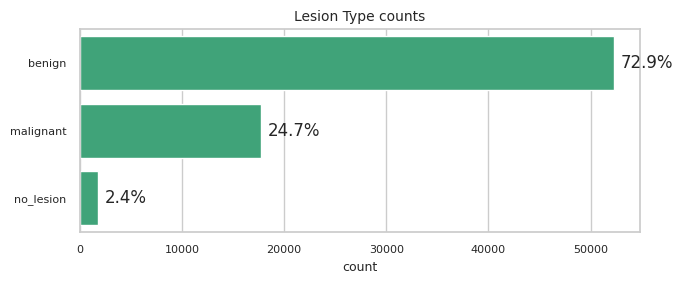

In [ ]:
order = df['lesion_type'].value_counts().index
total = len(df)

plt.figure(figsize=(7, max(3, 0.35*len(order))))
ax = sns.countplot(data=df, y='lesion_type', order=order,
                   color=plt.cm.viridis(0.65), edgecolor='white')

ax.set_title('Lesion Type counts')
ax.set_xlabel('count'); ax.set_ylabel('')

# annotate count and % on each bar
for p in ax.patches:
    cnt = int(p.get_width())
    pct = 100 * cnt / total
    ax.text(p.get_width() + max(1, 0.01*total),
            p.get_y() + p.get_height()/2,
            f'{pct:.1f}%',
            va='center')

plt.tight_layout()
plt.show()

#### Diagnosis

In [ ]:
df['diagnosis'].unique()

array(['NV', 'MEL', 'BKL', 'UNKNOWN', 'DF', 'AKIEC', 'BCC', 'VASC',
       'SCCKA', 'SCC', 'INF', 'BEN_OTH', 'MAL_OTH', 'NO_LESION'],
      dtype=object)

In [ ]:
df['diagnosis'].value_counts()
# there are many diagnosis, and some of them do not have a good representation (less than 1% of the observations).
# i have decided to group the diagnosis into less categories.

,count
diagnosis,
UNKNOWN,26698
NV,20468
BCC,8453
MEL,6165
BKL,4142
NO_LESION,1750
AKIEC,1705
SCCKA,946
SCC,431


In [ ]:
# I am going to group the possible diagnosis into:
  # nv: melanocytiv nevi
  # mel: melanoma
  # bkl: benign keratosis like lesoins
  # bcc: basal cell carcinoma
  # scc_akiec: acytic keratosis and squamous cell carcinoma
  # vasc: vascular lesions
  # df: dermatofibroma
  # other: inflamatory, other malignant and other benign, as they have very low representation.
  # unknown
  # no lesion

dx_map9 = {
    'NV':'nv', 'MEL':'mel', 'BKL':'bkl', 'BCC':'bcc',
    'AKIEC':'scc_akiec', 'SCC':'scc_akiec', 'SCCKA':'scc_akiec',
    'VASC':'vasc', 'DF':'df',
    'INF':'other', 'BEN_OTH':'other',
    'MAL_OTH':'other',
    'UNKNOWN':'unknown', 'NO_LESION':'no_lesion'
}

df['diagnosis_grouped'] = df['diagnosis'].map(dx_map9)

In [ ]:
vc = df['diagnosis_grouped'].value_counts(dropna=False)
display(pd.DataFrame({"count": vc, "pct": (100*vc/vc.sum()).round(2)}))

,count,pct
diagnosis_grouped,,
unknown,26698,37.23
nv,20468,28.54
bcc,8453,11.79
mel,6165,8.60
bkl,4142,5.78
scc_akiec,3082,4.30
no_lesion,1750,2.44
df,389,0.54
vasc,386,0.54


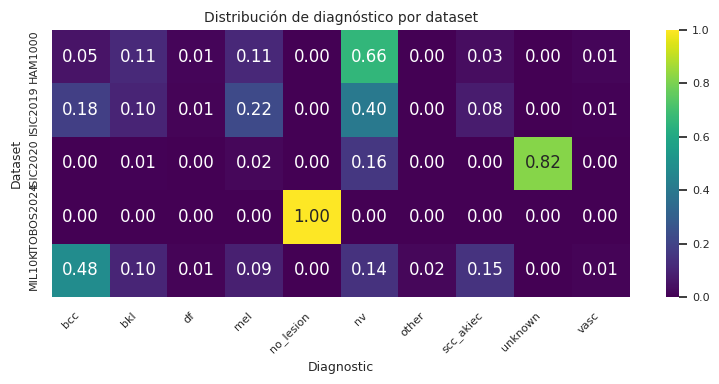

In [ ]:
ct = pd.crosstab(df['origin_dataset'], df['diagnosis_grouped'])
ct_norm = ct.div(ct.sum(axis=1), axis=0).round(3)

plt.figure(figsize=(8,4))
sns.heatmap(ct_norm, annot=True, fmt=".2f", cmap = 'viridis')
plt.ylabel('Dataset')
plt.xlabel('Diagnostic')
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 90, ha = 'right')
plt.title("Distribución de diagnóstico por dataset")
plt.tight_layout()
plt.show()

# isic2020 provides a lot of lesion_type categories but there is not certainty in the diagnosis type, as most of the occurrences are unknown.
# as expected, itobos2024 provides all the no_lesion diagnosis-

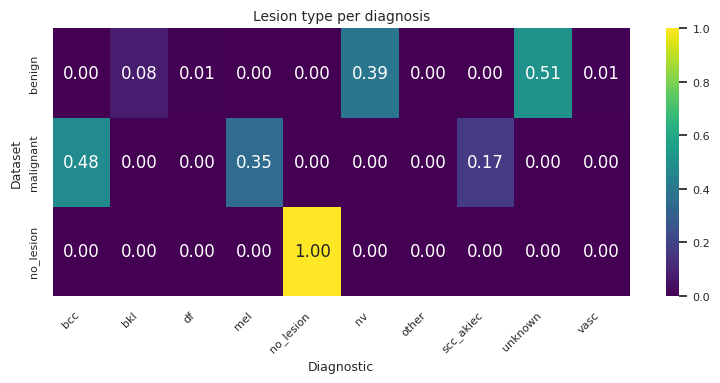

In [ ]:
ct = pd.crosstab(df['lesion_type'], df['diagnosis_grouped'])
ct_norm = ct.div(ct.sum(axis=1), axis=0).round(3)

plt.figure(figsize=(8,4))
sns.heatmap(ct_norm, annot=True, fmt=".2f", cmap = 'viridis')
plt.ylabel('Dataset')
plt.xlabel('Diagnostic')
plt.xticks(rotation = 45, ha = 'right')
plt.title("Lesion type per diagnosis")
plt.tight_layout()
plt.show()

# as expected, all the unknown are benign.


In [ ]:
ct

diagnosis_grouped,bcc,bkl,df,mel,no_lesion,nv,other,scc_akiec,unknown,vasc
lesion_type,,,,,,,,,,
benign,0,4142,389,0,0,20468,164,0,26698,386
malignant,8453,0,0,6165,0,0,18,3082,0,0
no_lesion,0,0,0,0,1750,0,0,0,0,0


### Other variables

#### Numeric Variables

##### Age

In [ ]:
df['age'].describe() # this is because df['age'] contains value 'not_provided'

,age
count,71715
unique,45
top,50
freq,7902


In [ ]:
pd.to_numeric(df['age'][df['age'] != 'not_provided']).describe() # there are no incorrent values. All ages are between 0 and 90, which biologically makes sense.

,age
count,70872.000000
mean,52.613924
std,16.536828
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,90.000000


In [ ]:
df['age'].value_counts().sort_values(ascending = False)

,count
age,
50,7902
45,7779
55,7112
60,6528
40,6321
65,6198
70,5610
35,4800
75,4086


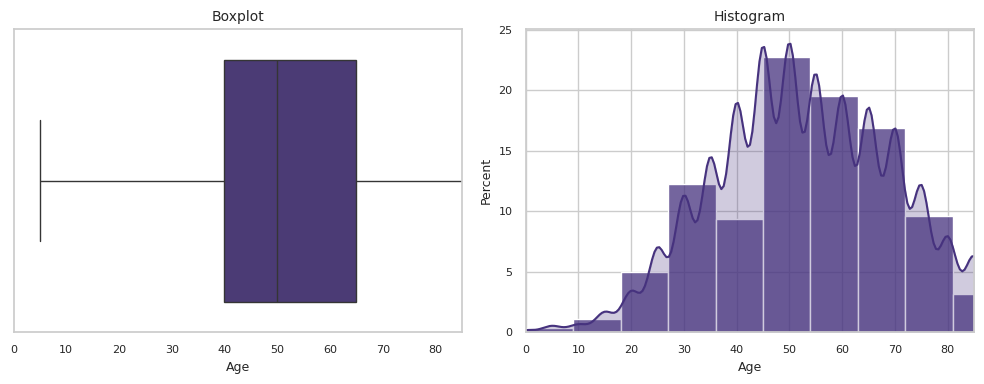

In [ ]:
col = 'age'

# Pasar a numérico; lo no convertible (p.ej. 'not_provided') será NaN
age_num = pd.to_numeric(df[col], errors='coerce')
df_num = df.assign(**{col: age_num}).dropna(subset=[col])

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# Boxplot
sns.boxplot(x=col, data=df_num, showfliers=False, ax=axs[0])
axs[0].set_title('Boxplot'); axs[0].set_xlabel('Age'); axs[0].set_yticks([]); axs[0].grid(axis='x')

# Hist + KDE
sns.histplot(data=df_num, x=col, stat='percent', bins=10, kde=True, alpha=0.75, ax=axs[1])
if axs[1].lines:
    line = axs[1].lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    axs[1].fill_between(x, y, alpha=0.25, color=line.get_color())
axs[1].set_title('Histogram'); axs[1].set_xlabel('Age'); axs[1].set_ylabel('Percent'); axs[1].grid(True)

# Límites robustos
lo, hi = np.nanpercentile(df_num[col], [0, 99.5])
axs[0].set_xlim(lo, hi); axs[1].set_xlim(lo, hi)

plt.tight_layout(); plt.show()


##### Width and Height

In [ ]:
df[['width', 'height']].describe()

,width,height
count,71715.000000,71715.000000
mean,2256.064129,1576.637914
std,2155.058020,1402.502783
min,576.000000,450.000000
25%,600.000000,450.000000
50%,1024.000000,1024.000000
75%,4288.000000,2848.000000
max,6000.000000,6000.000000


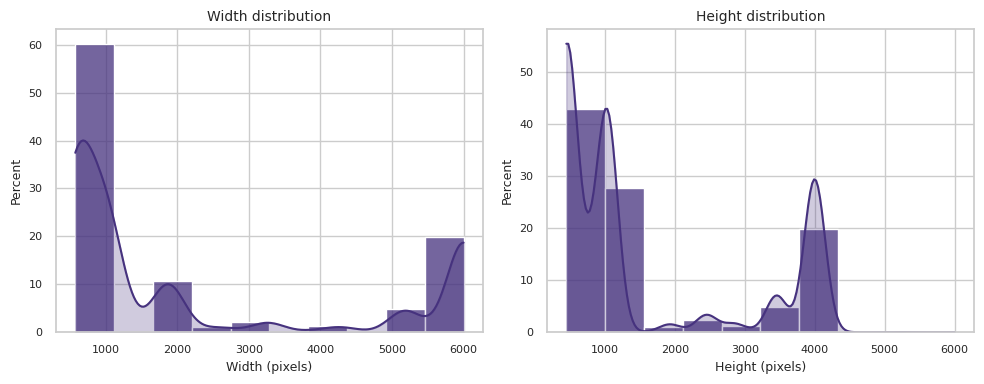

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# --- Width ---
ax = axs[0]
sns.histplot(data=df, x='width', stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE (use the last line on the axes)
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Width distribution')
ax.set_xlabel('Width (pixels)')
ax.set_ylabel('Percent')

# --- Height ---
ax = axs[1]
sns.histplot(data=df, x='height', stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Height distribution')
ax.set_xlabel('Height (pixels)')
ax.set_ylabel('Percent')

plt.tight_layout()
plt.show()


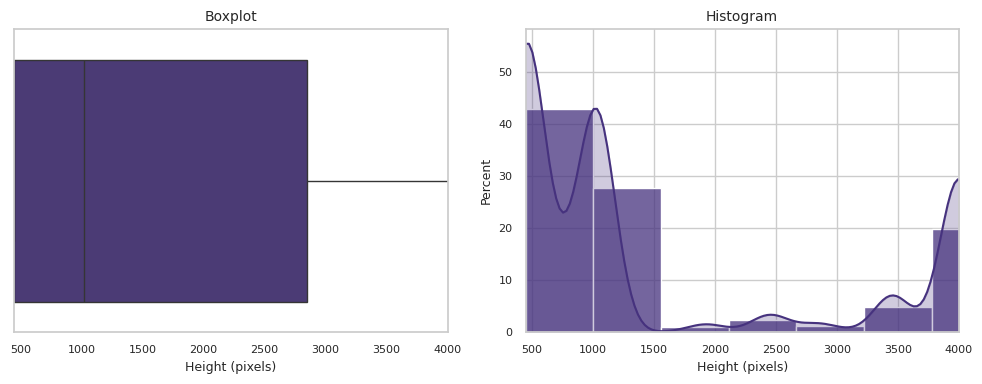

In [ ]:
col_name = 'height'
xlabel = 'Height (pixels)'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df[col_name], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()

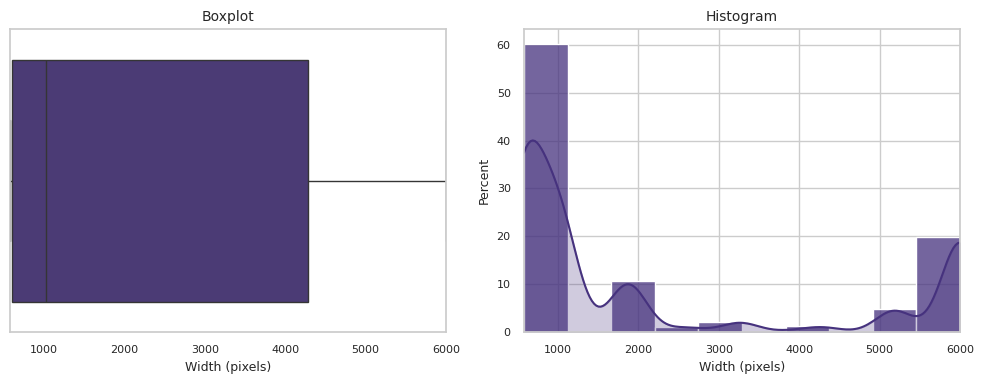

In [ ]:
col_name = 'width'
xlabel = 'Width (pixels)'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df[col_name], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()

##### Brightness

In [ ]:
df['brightness'].describe()

,brightness
count,71715.000000
mean,155.919149
std,35.534575
min,0.000000
25%,135.010169
50%,155.875635
75%,180.085565
max,246.012721


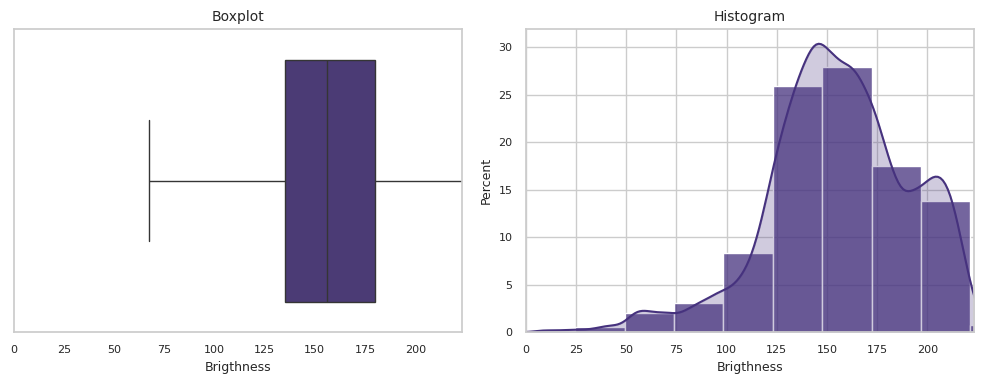

In [ ]:
col_name = 'brightness'
xlabel = 'Brigthness'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df[col_name], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()

##### Blur var

In [ ]:
df['blur_var'].describe()

,blur_var
count,71715.000000
mean,85.004531
std,202.762872
min,0.000000
25%,13.411818
50%,26.169749
75%,67.945547
max,9469.602856


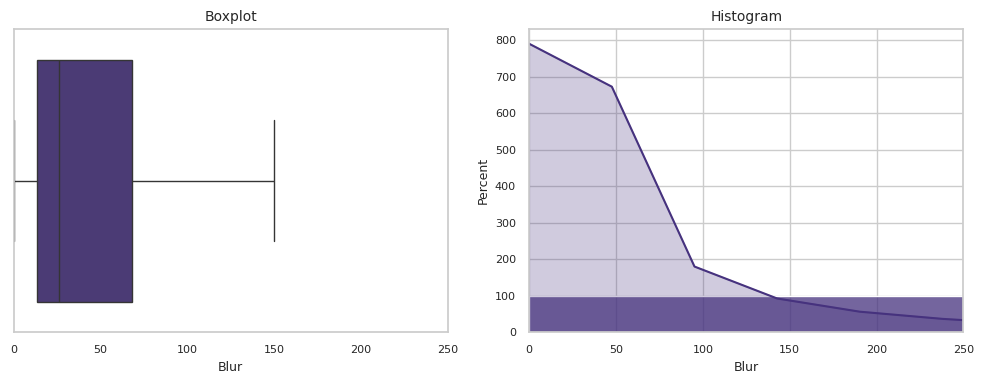

In [ ]:
col_name = 'blur_var'
xlabel = 'Blur'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, stat='percent',  bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df[col_name], [0, 99.5])
axs[0].set_xlim(lo, 250)
axs[1].set_xlim(lo, 250)

plt.tight_layout()
plt.show()

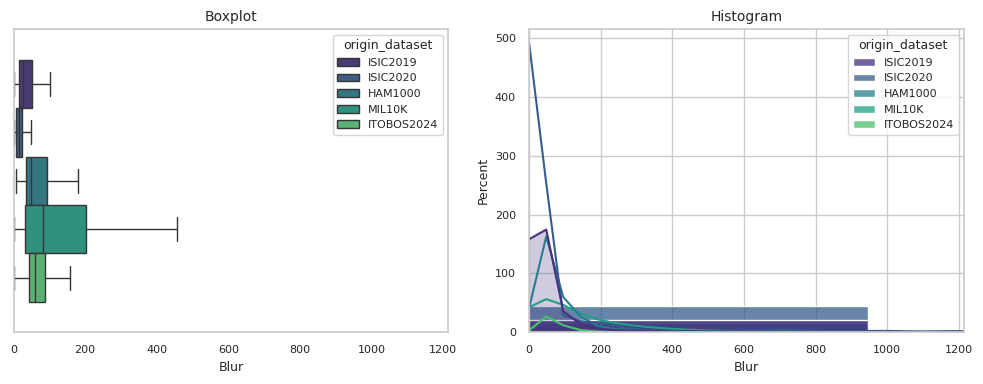

In [ ]:
col_name = 'blur_var'
xlabel = 'Blur'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, hue = 'origin_dataset', showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, stat='percent', hue = 'origin_dataset',  bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df[col_name], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()

##### Hue entropy

In [ ]:
df['hue_entropy'].describe()

,hue_entropy
count,7.171500e+04
mean,3.900551e+00
std,9.121636e-01
min,7.134059e-09
25%,3.228507e+00
50%,3.758412e+00
75%,4.518480e+00
max,6.955611e+00


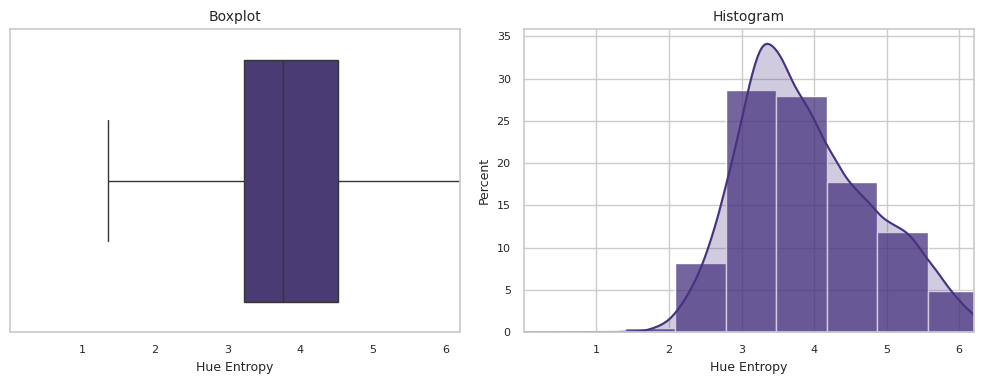

In [ ]:
col_name = 'hue_entropy'
xlabel = 'Hue Entropy'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df[col_name], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()

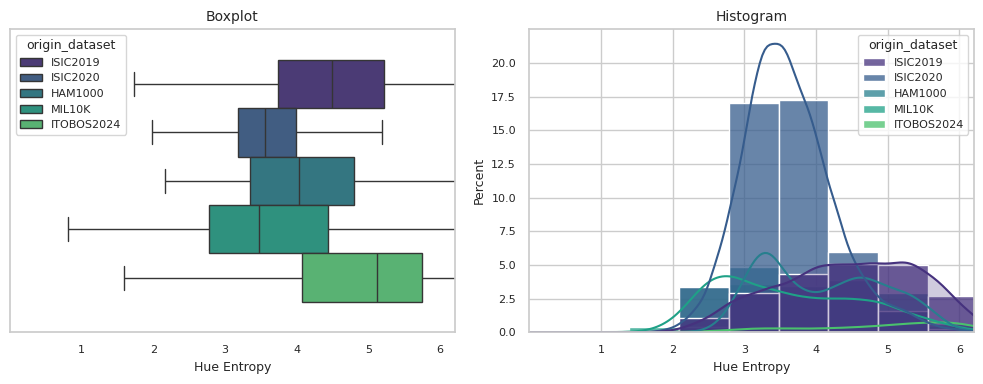

In [ ]:
col_name = 'hue_entropy'
xlabel = 'Hue Entropy'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, hue = 'origin_dataset', showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, hue = 'origin_dataset',  stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df[col_name], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()

##### Hair ratio

In [ ]:
df['hair_ratio'].describe()

,hair_ratio
count,71715.000000
mean,0.016663
std,0.036108
min,0.000000
25%,0.000700
50%,0.003830
75%,0.016465
max,0.781726


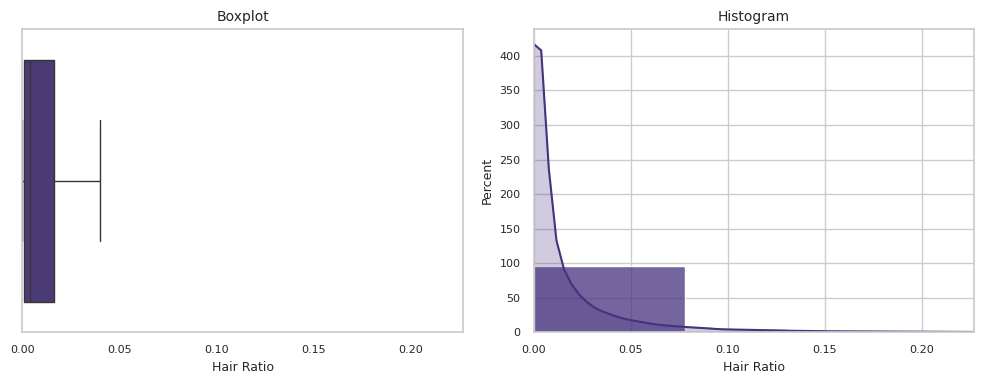

In [ ]:
col_name = 'hair_ratio'
xlabel = 'Hair Ratio'
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplot (horizontal) ---
ax = axs[0]
sns.boxplot(x=col_name, data=df, showfliers=False, ax=ax)
ax.set_title('Boxplot')
ax.set_xlabel(xlabel)
ax.set_ylabel('')
ax.set_yticks([])              # cleaner
ax.grid(axis='x')

# --- Histogram + KDE ---
ax = axs[1]
sns.histplot(data=df, x=col_name, stat='percent', bins=10, kde=True, alpha=0.75, ax=ax)

# Shade the KDE
if ax.lines:
    line = ax.lines[-1]
    x, y = line.get_xdata(), line.get_ydata()
    ax.fill_between(x, y, alpha=0.25, color=line.get_color())

ax.set_title('Histogram')
ax.set_xlabel(xlabel)
ax.set_ylabel('Percent')
ax.grid(True)

# Optional: align x-limits (e.g., robust to outliers)
lo, hi = np.nanpercentile(df['hair_ratio'], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()

##### Color channels

In [ ]:
df[['r_mean', 'b_mean', 'g_mean']].describe()

,r_mean,b_mean,g_mean
count,71715.000000,71715.000000,71715.000000
mean,185.387812,138.302361,144.315163
std,39.614568,39.614195,35.671735
min,0.000000,0.000000,0.000000
25%,163.383789,111.973930,121.872379
50%,187.810501,139.031921,143.824707
75%,216.015617,166.030006,170.201889
max,254.288025,243.079559,247.415909


/tmp/ipython-input-586164165.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=long, x='value', y='channel', order=order,
/tmp/ipython-input-586164165.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(title='Channel')


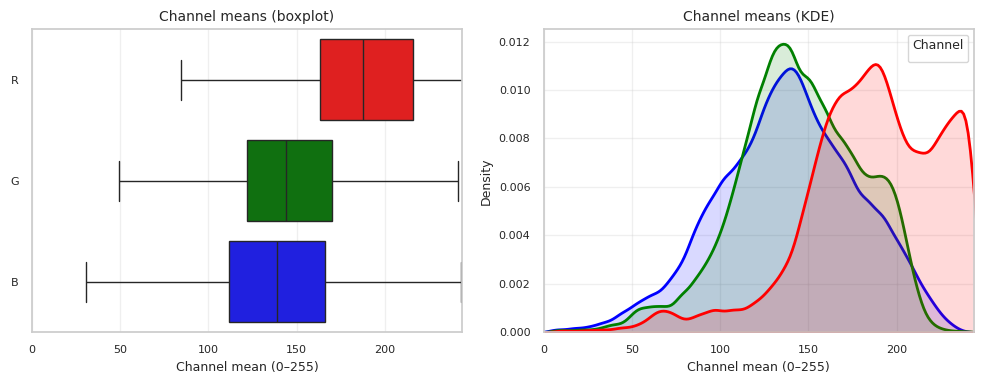

In [ ]:
# Long form: channel/value
long = (df[['r_mean','g_mean','b_mean']]
        .rename(columns={'r_mean':'R','g_mean':'G','b_mean':'B'})
        .melt(var_name='channel', value_name='value')
        .dropna())

order = ['R','G','B']
rgb_palette = {'R':'red', 'G':'green', 'B':'blue'}

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# --- Boxplots per channel ---
sns.boxplot(data=long, x='value', y='channel', order=order,
            showfliers=False, ax=axs[0], palette=rgb_palette)
axs[0].set(title='Channel means (boxplot)', xlabel='Channel mean (0–255)', ylabel='')
axs[0].grid(axis='x', alpha=0.3)

# --- KDEs overlaid (no hist) ---
sns.kdeplot(data=long, x='value', hue='channel', hue_order=order,
            palette=rgb_palette, common_norm=False, fill=True, alpha=0.15,
            lw=2, cut=0, clip=(0,255), bw_adjust=0.8, ax=axs[1])
axs[1].set(title='Channel means (KDE)', xlabel='Channel mean (0–255)', ylabel='Density')
axs[1].grid(True, alpha=0.3)
axs[1].legend(title='Channel')

# Shared, robust x-limits
lo, hi = np.nanpercentile(long['value'], [0, 99.5])
axs[0].set_xlim(lo, hi)
axs[1].set_xlim(lo, hi)

plt.tight_layout()
plt.show()


#### Categorical variables

##### Body region

In [ ]:
df['body_region'].unique() # body region has many different values

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', 'not_provided', 'lateral torso', 'head/neck',
       'palms/soles', 'trunk', 'chest', 'back', 'abdomen', 'foot', 'face',
       'neck', 'scalp', 'genital', 'hand', 'ear', 'acral',
       'upper_extremity', 'oral/genital', 'torso', 'head_neck_face',
       'lower_extremity', 'left arm - lower', 'right leg - lower',
       'left leg - upper', 'right arm - lower', 'left leg - lower',
       'right arm - upper', 'right leg - upper', 'left arm - upper',
       'right arm', 'left leg', 'left arm', 'right leg'], dtype=object)

In [ ]:
df['body_region'].value_counts() # adn there are a lot of regions that are not well represented, so I am going to group into "bigger" body parts.

,count
body_region,
torso,17175
lower extremity,13222
upper extremity,7859
anterior torso,5480
trunk,5405
head/neck,5293
head_neck_face,2982
back,2469
not_provided,2105


In [ ]:
# I decided to group the body regions into:
  # trunk
  # upper extremity
  # lower extremity
  # head, neck and face
  # acral
  # mucosal/genital
  # unknown

loc_map = {
    # trunk
    'anterior torso':'trunk','posterior torso':'trunk','lateral torso':'trunk',
    'trunk':'trunk','torso':'trunk','chest':'trunk','back':'trunk','abdomen':'trunk',

    # upper extremity
    'upper extremity':'upper_extremity','upper_extremity':'upper_extremity',
    'left arm - lower':'upper_extremity','left arm - upper':'upper_extremity',
    'right arm - lower':'upper_extremity','right arm - upper':'upper_extremity',
    'right arm':'upper_extremity','left arm':'upper_extremity',

    # lower extremity
    'lower extremity':'lower_extremity','lower_extremity':'lower_extremity',
    'left leg - lower':'lower_extremity','left leg - upper':'lower_extremity',
    'right leg - lower':'lower_extremity','right leg - upper':'lower_extremity',
    'right leg':'lower_extremity','left leg':'lower_extremity',

    # head/neck/face
    'head/neck':'head_neck_face','head_neck_face':'head_neck_face',
    'face':'head_neck_face','neck':'head_neck_face','scalp':'head_neck_face','ear':'head_neck_face',

    # acral (hands/feet/palms/soles)
    'palms/soles':'acral','hand':'acral','foot':'acral','acral':'acral',

    # mucosal / genital
    'genital':'mucosal_genital','oral/genital':'mucosal_genital',

    # unknown
    'not_provided':'unknown',
}


df['body_region'] = df['body_region'].replace(loc_map)

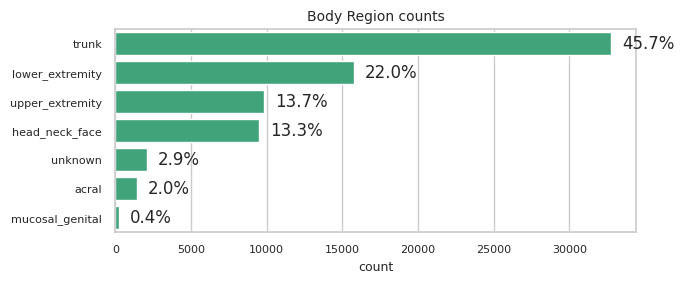

In [ ]:
# this gives us much better representation than what we had before.

order = df['body_region'].value_counts().index
total = len(df)

plt.figure(figsize=(7, max(3, 0.35*len(order))))
ax = sns.countplot(data=df, y='body_region', order=order,
                   color=plt.cm.viridis(0.65), edgecolor='white')

ax.set_title('Body Region counts')
ax.set_xlabel('count'); ax.set_ylabel('')

# annotate count and % on each bar
for p in ax.patches:
    cnt = int(p.get_width())
    pct = 100 * cnt / total
    ax.text(p.get_width() + max(1, 0.01*total),
            p.get_y() + p.get_height()/2,
            f'{pct:.1f}%',
            va='center')

plt.tight_layout()
plt.show()

##### Gender

In [ ]:
df['gender'].unique() # as expected, there are no weird values

array(['female', 'male', 'not_provided'], dtype=object)

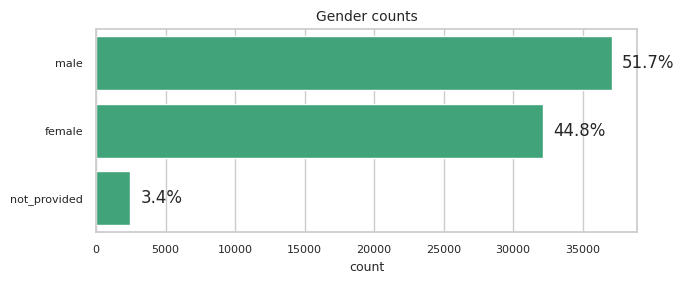

In [ ]:
order = df['gender'].value_counts().index
total = len(df)

plt.figure(figsize=(7, max(3, 0.35*len(order))))
ax = sns.countplot(data=df, y='gender', order=order,
                   color=plt.cm.viridis(0.65), edgecolor='white')

ax.set_title('Gender counts')
ax.set_xlabel('count'); ax.set_ylabel('')

# annotate count and % on each bar
for p in ax.patches:
    cnt = int(p.get_width())
    pct = 100 * cnt / total
    ax.text(p.get_width() + max(1, 0.01*total),
            p.get_y() + p.get_height()/2,
            f'{pct:.1f}%',
            va='center')

plt.tight_layout()
plt.show()

#### Relationships between variables

##### Pairplot with lesion type

In [ ]:

sns.pairplot(data = df, hue = 'lesion_type', palette = 'viridis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### Pairplot with diagnosis grouped

In [ ]:
df2 = df[(df['diagnosis_grouped'] != 'unknown') & (df['diagnosis_grouped'] != 'other')] # this two will be removed for training because they have very low representation
sns.pairplot(data = df2, hue = 'diagnosis_grouped', palette = 'viridis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### Pairplot with original dataset

In [ ]:
# df2 = df[(df['diagnosis_grouped'] != 'unknown') & (df['diagnosis_grouped'] != 'other')] # this two will be removed for training because they have very low representation
sns.pairplot(data = df, hue = 'origin_dataset', palette = 'viridis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### Age vs body region


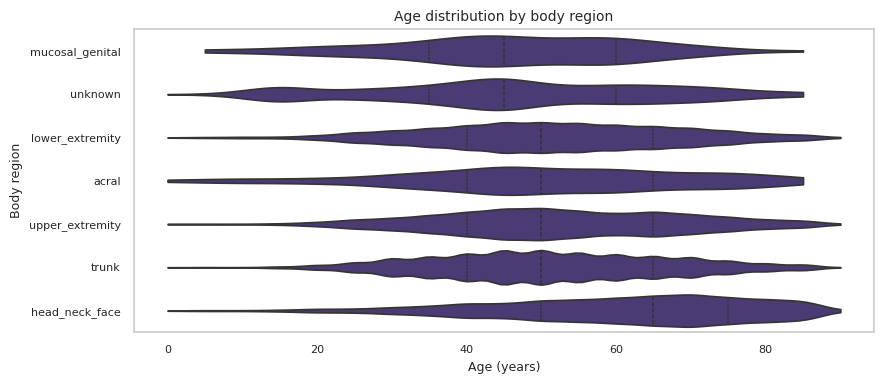

In [ ]:
dfaux = (
    df.replace({'age': {'not_provided': np.nan},
                'body_region': {'not_provided': np.nan}})
      .assign(age=lambda d: pd.to_numeric(d['age'], errors='coerce'))
      .dropna(subset=['age','body_region'])
)

# Order regions by median age for a more readable y-axis
order = (dfaux.groupby('body_region')['age']
           .median()
           .sort_values()
           .index)
plt.figure(figsize=(9, max(4, len(order)*0.35)))
sns.violinplot(data=dfaux, y='body_region', x='age', order=order,
               inner='quartile', cut=0)
plt.xlabel('Age (years)'); plt.ylabel('Body region')
plt.title('Age distribution by body region')

plt.grid(axis='x')
plt.tight_layout(); plt.show()

##### Age vs gender

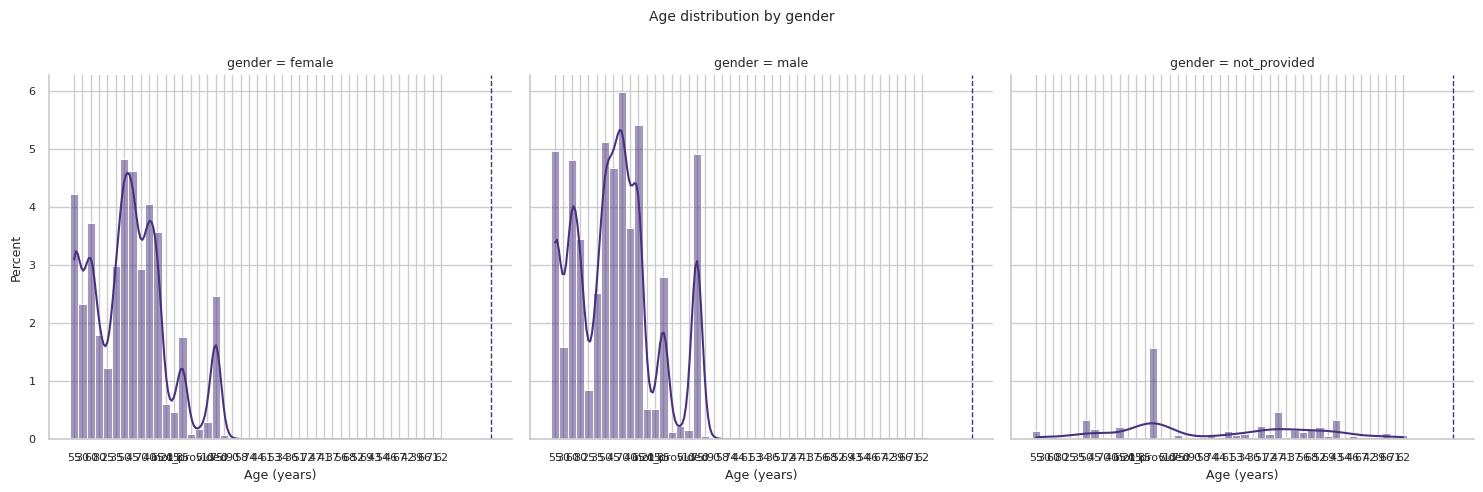

In [ ]:
bins = np.histogram_bin_edges(dfaux['age'], bins='fd')
# Reuse df2 and bins from above
g = sns.displot(
    data=df2, x='age', col='gender', col_wrap=3,
    bins=bins, stat='percent', kde=True, common_bins=True,
    facet_kws=dict(sharex=True, sharey=True)
)

# Add medians to each facet
def _median_line(data, color, **kws):
    plt.axvline(np.median(dfaux['age']), ls='--', lw=1)

g.map_dataframe(_median_line)
g.set_axis_labels('Age (years)', 'Percent')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Age distribution by gender')
plt.show()

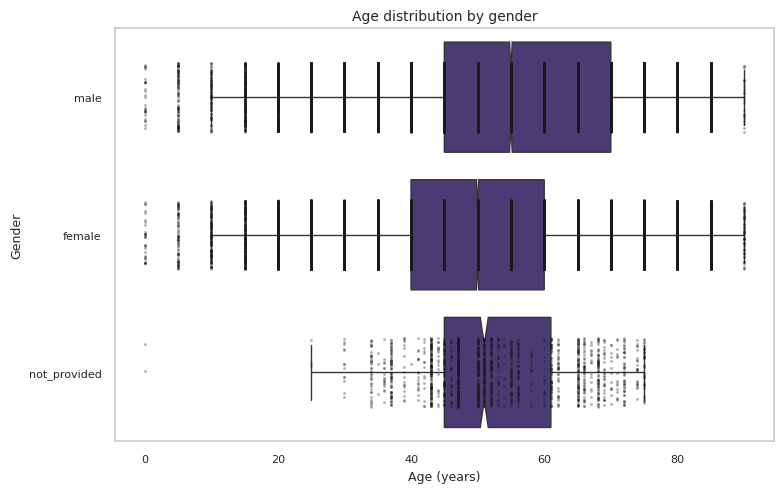

In [ ]:
order = dfaux['gender'].value_counts().index  # consistent ordering

plt.figure(figsize=(8, 0.7*len(order) + 3))
sns.boxplot(data=dfaux, y='gender', x='age', order=order, notch=True, showfliers=False)
sns.stripplot(data=dfaux, y='gender', x='age', order=order, alpha=0.35, size=2, jitter=0.25, color='k')
plt.xlabel('Age (years)')
plt.ylabel('Gender')
plt.title('Age distribution by gender')
plt.grid(axis='x')
plt.tight_layout(); plt.show()

##### Gender vs body region

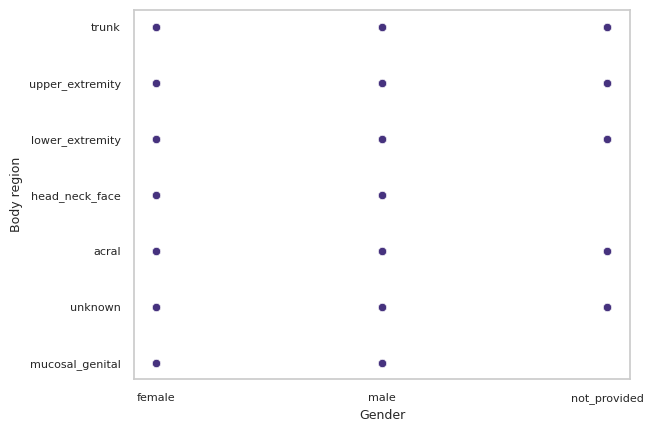

In [ ]:
sns.scatterplot(data = dfaux, x = 'gender', y = 'body_region') #, palette = 'viridis')
plt.ylabel('Body region')
plt.xlabel('Gender')
plt.grid()
plt.show()

##### Diagnosis vs body region

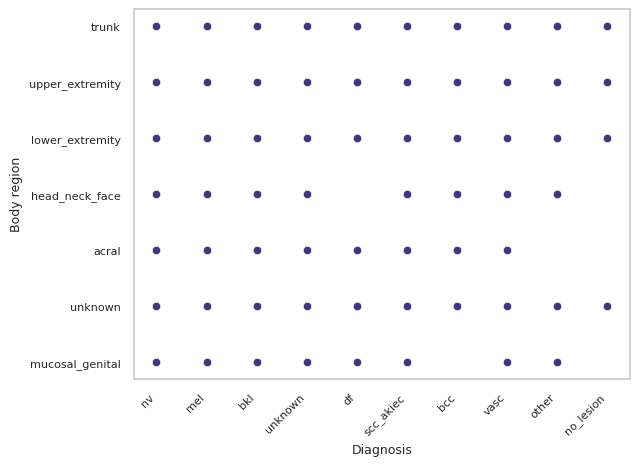

In [ ]:
sns.scatterplot(data = dfaux, x = 'diagnosis_grouped', y = 'body_region') #, palette = 'viridis')
plt.ylabel('Body region')
plt.xlabel('Diagnosis')
plt.xticks(rotation = 45, ha = 'right')
plt.grid()
plt.show()

##### Width and height wrt original dataset

<Axes: xlabel='width', ylabel='height'>

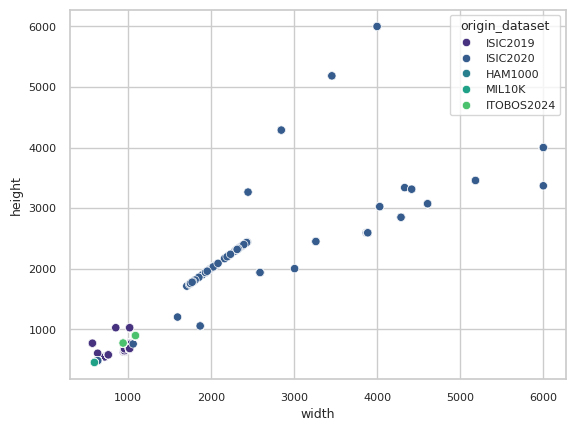

In [ ]:
sns.scatterplot(data = dfaux, x = 'width', y = 'height', hue = 'origin_dataset')

##### Hexbin of size

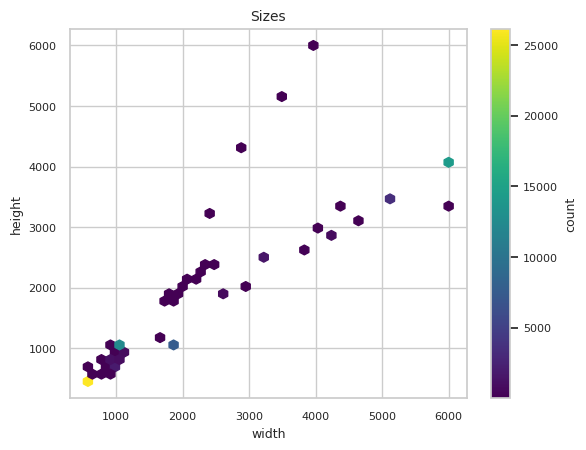

In [ ]:
plt.hexbin(df['width'], df['height'], gridsize=40, cmap='viridis', mincnt=1); plt.xlabel('width'); plt.ylabel('height'); plt.title('Sizes')
plt.colorbar(label='count')

##### Aspect ratio distribution

Text(0.5, 1.0, 'Aspect ratio')

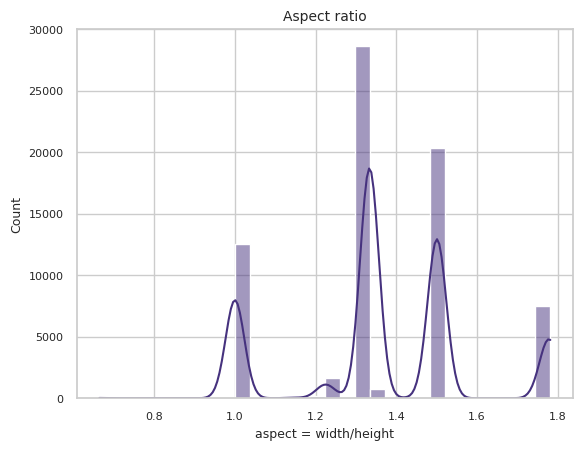

In [ ]:
sns.histplot(x=df['width']/df['height'], bins=30, kde=True) # , color=sns.color_palette('viridis')[6])
plt.xlabel('aspect = width/height'); plt.title('Aspect ratio')

##### Diagnosis mix by dataset

Text(0.5, 1.0, 'Diagnosis by dataset')

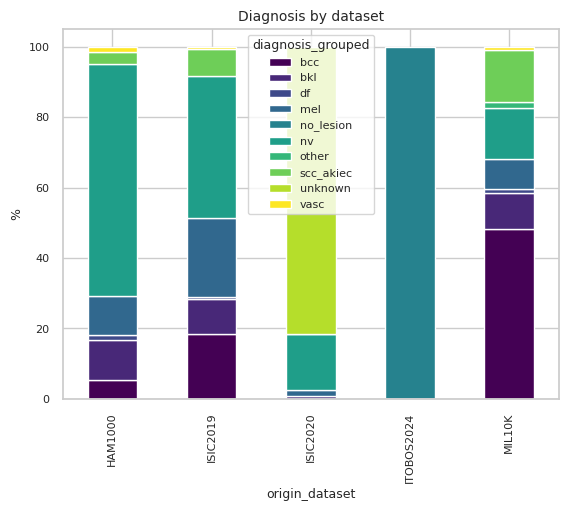

In [ ]:
mix = pd.crosstab(df['origin_dataset'], df['diagnosis_grouped'], normalize='index')*100
mix.plot(kind='bar', stacked=True, colormap='viridis'); plt.ylabel('%'); plt.title('Diagnosis by dataset')

#####Brightness, blur, hair vs diagnosis

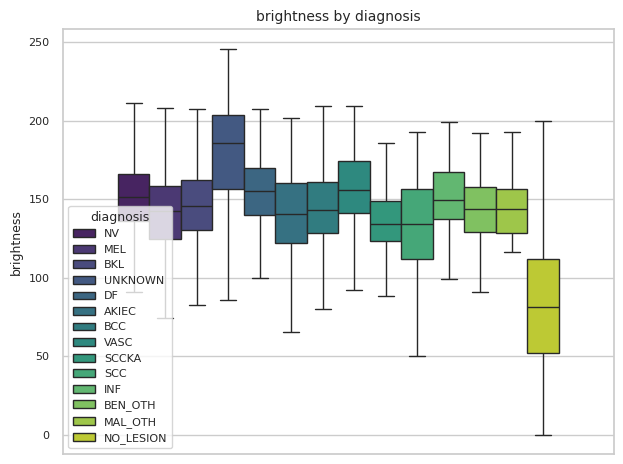

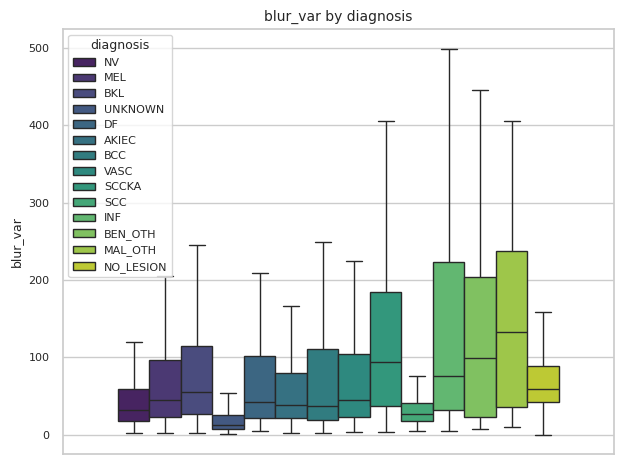

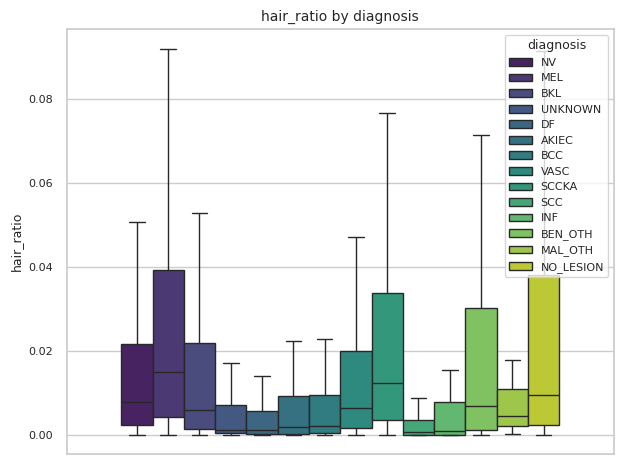

In [ ]:
for col in ['brightness','blur_var','hair_ratio']:
    sns.boxplot(data=df, y=col, hue = 'diagnosis', showfliers=False, palette='viridis')
    plt.title(f'{col} by diagnosis'); plt.xticks(rotation=30); plt.tight_layout(); plt.show()

##### Hair ratio by body region

/tmp/ipython-input-2442531280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='hair_ratio', y='body_region', inner='quartile', cut=0, palette='viridis')


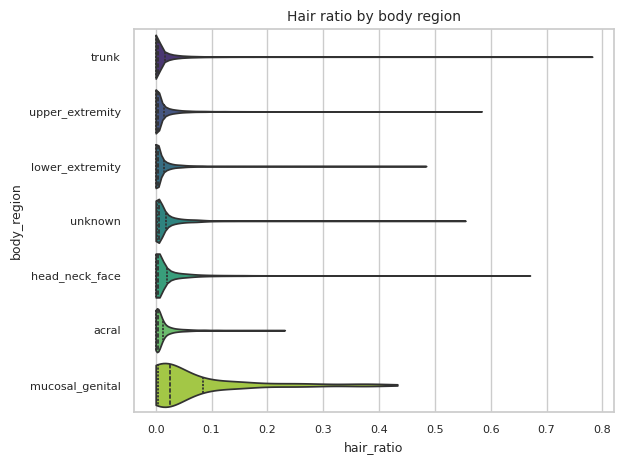

In [ ]:
sns.violinplot(data=df, x='hair_ratio', y='body_region', inner='quartile', cut=0, palette='viridis')
plt.title('Hair ratio by body region'); plt.tight_layout()


Text(0.5, 1.0, 'r_mean vs g_mean by diagnosis')

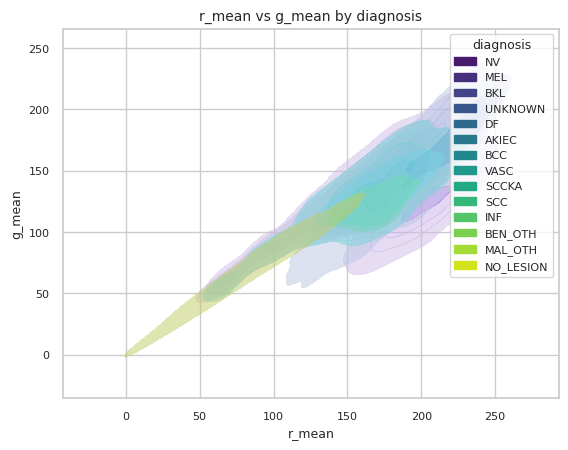

In [ ]:
sns.kdeplot(data=df, x='r_mean', y='g_mean', hue='diagnosis', fill=True, thresh=0.1, levels=5, alpha=0.5, palette='viridis')
plt.title('r_mean vs g_mean by diagnosis')

Text(0.5, 1.0, 'r_mean vs b_mean by diagnosis')

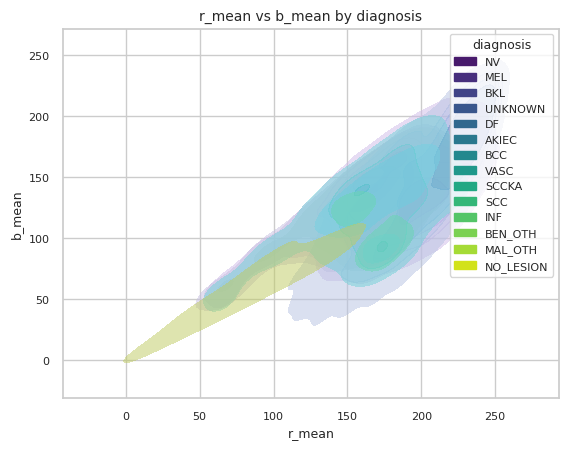

In [ ]:
sns.kdeplot(data=df, x='r_mean', y='b_mean', hue='diagnosis', fill=True, thresh=0.1, levels=5, alpha=0.5, palette='viridis')
plt.title('r_mean vs b_mean by diagnosis')

Text(0.5, 1.0, 'b_mean vs g_mean by diagnosis')

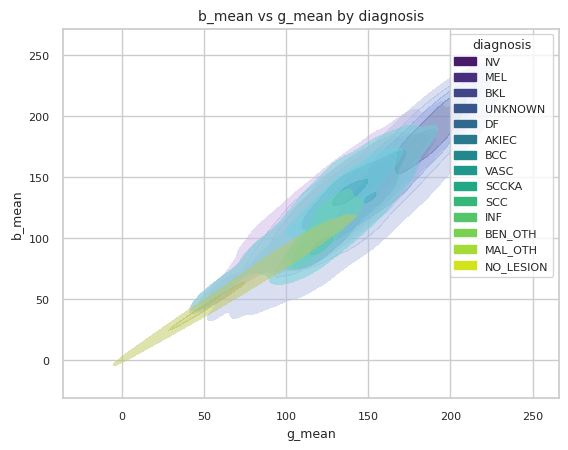

In [ ]:
sns.kdeplot(data=df, x='g_mean', y='b_mean', hue='diagnosis', fill=True, thresh=0.1, levels=5, alpha=0.5, palette='viridis')
plt.title('b_mean vs g_mean by diagnosis')

##### Correlation matrix

In [ ]:
num = ['age','width','height','brightness','blur_var','hue_entropy','hair_ratio','r_mean','g_mean','b_mean']
plt.figure(figsize = (8,8))
sns.heatmap(df[num].corr(method='spearman'), vmin=-1, vmax=1, center=0, cmap='viridis', square=True, annot = True)
plt.title('Spearman correlations')

ValueError: could not convert string to float: 'not_provided'

<Figure size 800x800 with 0 Axes>

##### Hair ratio and brightness

In [ ]:
g = sns.jointplot(data=df, x='hair_ratio', y='brightness', kind='hex', cmap='viridis')
g.fig.suptitle('Hair vs brightness'); plt.tight_layout()

##### Blur vs entropy by dataset

In [ ]:
sns.scatterplot(data=df, x='blur_var', y='hue_entropy', hue='origin_dataset', palette='viridis', alpha=0.7, s=30)
plt.title('Blur vs Hue entropy by dataset')

## Save modified metadata file

In [ ]:
# df.to_csv('gs://ucm_tfm_datos_carlotatrigo/metadata_clean.csv', index = False)